In [1]:
import numpy as np
import os

# DataFrames
import pandas as pd

# Visualisations
import matplotlib.pyplot as plt
import seaborn as sns

# ML
from joblib import load
from sklearn.metrics import mean_squared_error, r2_score

# 1. Préparation des données

### a. Import du dataset et inspection rapide

In [2]:
df = pd.read_csv("../data/bordeaux_2022.csv")

In [3]:
df.head()

,Identifiant de document,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,prix_m2
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2022,Vente,...,0,1.0,Maison,NaN,71.0,4.0,S,NaN,70.0,5577.464789
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,05/01/2022,Vente,...,1,2.0,Appartement,NaN,40.0,1.0,NaN,NaN,NaN,3962.500000
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,07/01/2022,Vente,...,1,3.0,Dépendance,NaN,0.0,0.0,NaN,NaN,NaN,inf
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,07/01/2022,Vente,...,1,2.0,Appartement,NaN,35.0,1.0,NaN,NaN,NaN,5342.857143
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,07/01/2022,Vente,...,1,3.0,Dépendance,NaN,0.0,0.0,NaN,NaN,NaN,inf


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 44 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Identifiant de document     0 non-null      float64
 1   Reference document          0 non-null      float64
 2   1 Articles CGI              0 non-null      float64
 3   2 Articles CGI              0 non-null      float64
 4   3 Articles CGI              0 non-null      float64
 5   4 Articles CGI              0 non-null      float64
 6   5 Articles CGI              0 non-null      float64
 7   No disposition              13200 non-null  int64  
 8   Date mutation               13200 non-null  object 
 9   Nature mutation             13200 non-null  object 
 10  Valeur fonciere             13200 non-null  float64
 11  No voie                     13155 non-null  float64
 12  B/T/Q                       402 non-null    object 
 13  Type de voie                131

### b. Filtre des biens de 4 pièces uniquement

In [5]:
df = df[df["Nombre pieces principales"] == 4.0]

### c. Création de datasets spécifiques maisons / appartements

In [6]:
df_maisons = df[df["Type local"] == "Maison"]

In [7]:
df_appartements = df[df["Type local"] == "Appartement"]

### d. Sélection des colonnes utiles

In [8]:
colonnes_utiles = ["Surface reelle bati", "Nombre pieces principales", "Type local", "Surface terrain", "Nombre de lots", "Valeur fonciere", "prix_m2"]

df_maisons = df_maisons[colonnes_utiles]
df_appartements = df_appartements[colonnes_utiles]

### e. Vérification des données

In [9]:
df_maisons.head()

,Surface reelle bati,Nombre pieces principales,Type local,Surface terrain,Nombre de lots,Valeur fonciere,prix_m2
0,71.0,4.0,Maison,70.0,0,396000.0,5577.464789
31,92.0,4.0,Maison,121.0,0,530000.0,5760.869565
48,129.0,4.0,Maison,175.0,0,700000.0,5426.356589
75,115.0,4.0,Maison,362.0,0,540000.0,4695.652174
141,120.0,4.0,Maison,50.0,0,555000.0,4625.000000


In [10]:
df_maisons.shape

(408, 7)

In [11]:
df_maisons.describe()

,Surface reelle bati,Nombre pieces principales,Surface terrain,Nombre de lots,Valeur fonciere,prix_m2
count,408.000000,408.0,386.000000,408.000000,4.080000e+02,408.000000
mean,100.134804,4.0,204.295337,0.071078,5.505339e+05,5509.101169
std,26.013963,0.0,129.491536,0.324808,2.875424e+05,2308.811392
min,42.000000,4.0,38.000000,0.000000,6.862000e+03,70.742268
25%,82.000000,4.0,116.250000,0.000000,4.000000e+05,4470.616883
50%,96.000000,4.0,166.000000,0.000000,5.100000e+05,5267.942584
75%,115.000000,4.0,251.750000,0.000000,6.394375e+05,6205.833727
max,210.000000,4.0,973.000000,3.000000,3.663324e+06,32708.245536


In [12]:
df_appartements.head()

,Surface reelle bati,Nombre pieces principales,Type local,Surface terrain,Nombre de lots,Valeur fonciere,prix_m2
13,108.0,4.0,Appartement,NaN,2,680000.0,6296.296296
23,75.0,4.0,Appartement,NaN,1,301300.0,4017.333333
57,64.0,4.0,Appartement,NaN,2,190500.0,2976.562500
110,68.0,4.0,Appartement,NaN,1,253000.0,3720.588235
136,126.0,4.0,Appartement,NaN,1,528000.0,4190.476190


In [13]:
df_appartements.shape

(663, 7)

In [14]:
df_appartements.describe()

,Surface reelle bati,Nombre pieces principales,Surface terrain,Nombre de lots,Valeur fonciere,prix_m2
count,663.000000,663.0,61.000000,663.000000,6.630000e+02,663.000000
mean,91.923077,4.0,832.901639,1.212670,4.952183e+05,5259.647304
std,22.766352,0.0,2321.583746,0.678782,5.422770e+05,5360.727387
min,30.000000,4.0,61.000000,0.000000,1.000000e+00,0.008333
25%,77.000000,4.0,140.000000,1.000000,2.728750e+05,3344.830380
50%,87.000000,4.0,249.000000,1.000000,3.631600e+05,4165.951220
75%,102.000000,4.0,400.000000,2.000000,5.225000e+05,5279.625524
max,252.000000,4.0,10897.000000,6.000000,7.500000e+06,68181.818182


Au vu des résultats, tout comme pour Lille je peux remplacer les valeurs manquantes dans le dataset des maisons par la médiane, et supprimer la colonne *Surface terrain* pour les appartements.

### f. Traitement des données

Maison : Remplacement des valeurs manquantes par la médiane

In [15]:
df_maisons["Surface terrain"] = df_maisons["Surface terrain"].fillna(df_maisons["Surface terrain"].median())

In [16]:
df_maisons.describe()

,Surface reelle bati,Nombre pieces principales,Surface terrain,Nombre de lots,Valeur fonciere,prix_m2
count,408.000000,408.0,408.000000,408.000000,4.080000e+02,408.000000
mean,100.134804,4.0,202.230392,0.071078,5.505339e+05,5509.101169
std,26.013963,0.0,126.240540,0.324808,2.875424e+05,2308.811392
min,42.000000,4.0,38.000000,0.000000,6.862000e+03,70.742268
25%,82.000000,4.0,119.000000,0.000000,4.000000e+05,4470.616883
50%,96.000000,4.0,166.000000,0.000000,5.100000e+05,5267.942584
75%,115.000000,4.0,244.250000,0.000000,6.394375e+05,6205.833727
max,210.000000,4.0,973.000000,3.000000,3.663324e+06,32708.245536


Appartements : suppression de la colonne Surface terrain

In [17]:
df_appartements = df_appartements.drop(columns=["Surface terrain"])

In [18]:
df_appartements.describe()

,Surface reelle bati,Nombre pieces principales,Nombre de lots,Valeur fonciere,prix_m2
count,663.000000,663.0,663.000000,6.630000e+02,663.000000
mean,91.923077,4.0,1.212670,4.952183e+05,5259.647304
std,22.766352,0.0,0.678782,5.422770e+05,5360.727387
min,30.000000,4.0,0.000000,1.000000e+00,0.008333
25%,77.000000,4.0,1.000000,2.728750e+05,3344.830380
50%,87.000000,4.0,1.000000,3.631600e+05,4165.951220
75%,102.000000,4.0,2.000000,5.225000e+05,5279.625524
max,252.000000,4.0,6.000000,7.500000e+06,68181.818182


# 2. Boxplots et outliers

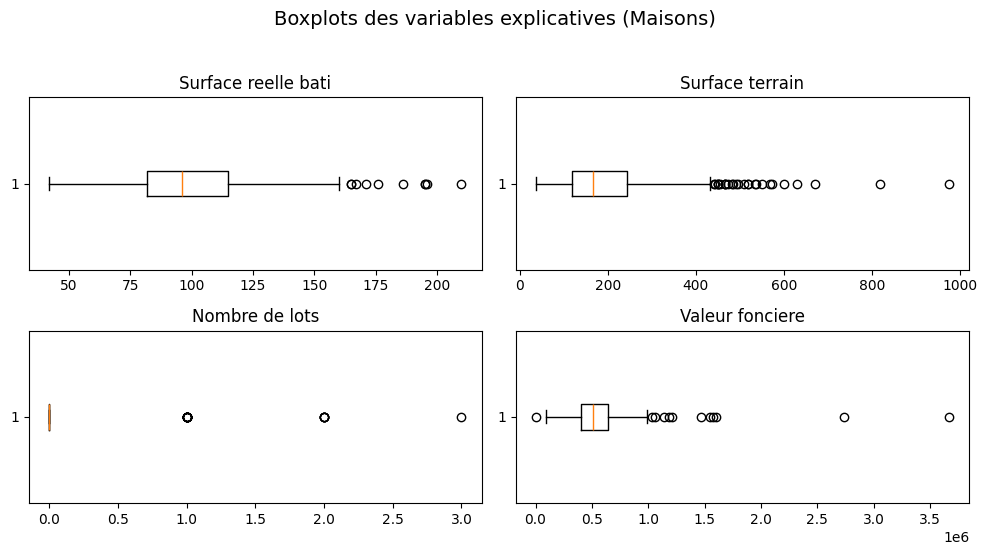

In [19]:
# On retire la target (valeur_m2) si elle est dans les colonnes
features = df_maisons.drop(columns=["Type local", "Nombre pieces principales", "prix_m2"]).select_dtypes(include='number').columns

# Taille de la grille (adapter selon ton nombre de features)
n_cols = 2
n_rows = (len(features) + n_cols - 1) // n_cols

plt.figure(figsize=(10, 5))

for i, feature in enumerate(features, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.boxplot(x=df_maisons[feature], vert=False)
    plt.title(f"{feature}")
    plt.xlabel("")  # Optionnel : masque l'axe x si c'est surchargé

plt.tight_layout()
plt.suptitle("Boxplots des variables explicatives (Maisons)", fontsize=14, y=1.1)
plt.show()

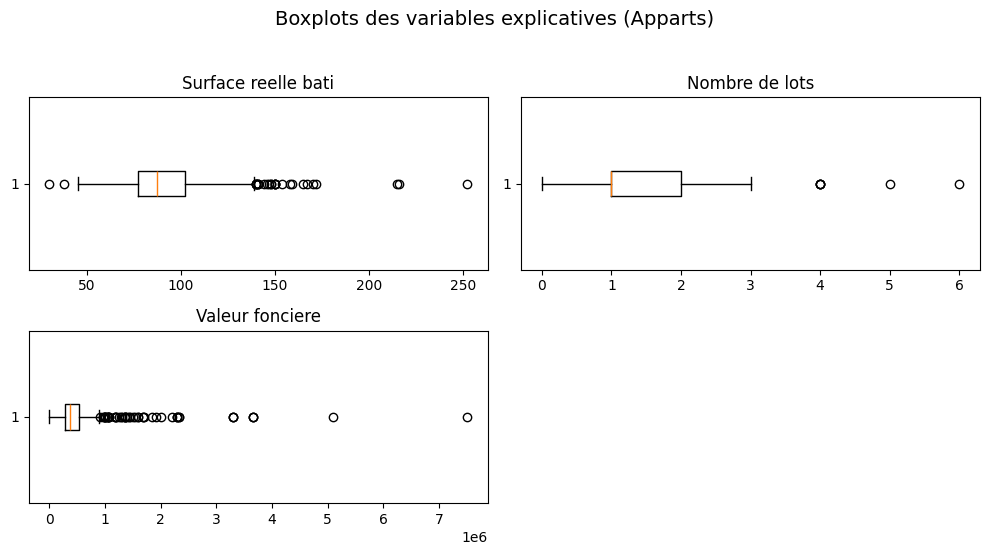

In [20]:
# On retire la target (valeur_m2) si elle est dans les colonnes
features = df_appartements.drop(columns=["Type local", "Nombre pieces principales", "prix_m2"]).select_dtypes(include='number').columns

# Taille de la grille (adapter selon ton nombre de features)
n_cols = 2
n_rows = (len(features) + n_cols - 1) // n_cols

plt.figure(figsize=(10, 5))

for i, feature in enumerate(features, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.boxplot(x=df_appartements[feature], vert=False)
    plt.title(f"{feature}")
    plt.xlabel("")  # Optionnel : masque l'axe x si c'est surchargé

plt.tight_layout()
plt.suptitle("Boxplots des variables explicatives (Apparts)", fontsize=14, y=1.1)
plt.show()

In [21]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return (
        lower_bound, 
        upper_bound, 
        df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        )

Pour les maisons :

In [ ]:
print("Surface reelle bati :")
display(detect_outliers(df_maisons, "Surface reelle bati")[2])

print("Outliers Surface terrain :")
display(detect_outliers(df_maisons, "Surface terrain")[2])

print("Outliers Nombre de lots :")
display(detect_outliers(df_maisons, "Nombre de lots")[2])

print("Outliers Valeur fonciere :")
display(detect_outliers(df_maisons, "Valeur fonciere")[2])

print("Outliers prix_m2 :")
display(detect_outliers(df_maisons, "prix_m2")[2])

In [23]:
lower_bound, upper_bound, _ = detect_outliers(df_maisons, "Surface reelle bati")
df_maisons = df_maisons[~((df_maisons["Surface reelle bati"] < lower_bound) | (df_maisons["Surface reelle bati"] > upper_bound))]

lower_bound, upper_bound, _ = detect_outliers(df_maisons, "Surface terrain")
df_maisons = df_maisons[~((df_maisons["Surface terrain"] < lower_bound) | (df_maisons["Surface terrain"] > upper_bound))]

lower_bound, upper_bound, _ = detect_outliers(df_maisons, "Valeur fonciere")
df_maisons = df_maisons[~((df_maisons["Valeur fonciere"] < lower_bound) | (df_maisons["Valeur fonciere"] > upper_bound))]

lower_bound, upper_bound, _ = detect_outliers(df_maisons, "prix_m2")
df_maisons = df_maisons[~((df_maisons["prix_m2"] < lower_bound) | (df_maisons["prix_m2"] > upper_bound))]

In [24]:
df_maisons.describe()

,Surface reelle bati,Nombre pieces principales,Surface terrain,Nombre de lots,Valeur fonciere,prix_m2
count,343.000000,343.0,343.000000,343.000000,343.000000,343.000000
mean,98.478134,4.0,174.335277,0.075802,511766.516618,5211.771889
std,22.066592,0.0,84.044413,0.333461,164007.377933,1230.642706
min,45.000000,4.0,38.000000,0.000000,170000.000000,2051.548387
25%,82.500000,4.0,113.000000,0.000000,399500.000000,4441.038204
50%,96.000000,4.0,161.000000,0.000000,495200.000000,5217.391304
75%,113.000000,4.0,221.500000,0.000000,607458.000000,6000.000000
max,160.000000,4.0,422.000000,3.000000,938500.000000,8487.500000


Pour les appartements :

In [ ]:
print("Surface reelle bati :")
display(detect_outliers(df_appartements, "Surface reelle bati")[2])

print("Outliers Nombre de lots :")
display(detect_outliers(df_appartements, "Nombre de lots")[2])

print("Outliers Valeur fonciere :")
display(detect_outliers(df_appartements, "Valeur fonciere")[2])

print("Outliers prix_m2 :")
display(detect_outliers(df_appartements, "prix_m2")[2])

In [26]:
lower_bound, upper_bound, _ = detect_outliers(df_appartements, "Surface reelle bati")
df_appartements = df_appartements[~((df_appartements["Surface reelle bati"] < lower_bound) | (df_appartements["Surface reelle bati"] > upper_bound))]

lower_bound, upper_bound, _ = detect_outliers(df_appartements, "Nombre de lots")
df_appartements = df_appartements[~((df_appartements["Nombre de lots"] < lower_bound) | (df_appartements["Nombre de lots"] > upper_bound))]

lower_bound, upper_bound, _ = detect_outliers(df_appartements, "Valeur fonciere")
df_appartements = df_appartements[~((df_appartements["Valeur fonciere"] < lower_bound) | (df_appartements["Valeur fonciere"] > upper_bound))]

lower_bound, upper_bound, _ = detect_outliers(df_appartements, "prix_m2")
df_appartements = df_appartements[~((df_appartements["prix_m2"] < lower_bound) | (df_appartements["prix_m2"] > upper_bound))]

In [27]:
df_appartements.describe()

,Surface reelle bati,Nombre pieces principales,Nombre de lots,Valeur fonciere,prix_m2
count,568.000000,568.0,568.000000,568.000000,568.000000
mean,88.941901,4.0,1.269366,365746.273063,4059.040922
std,16.630918,0.0,0.520797,138657.187888,1133.971539
min,46.000000,4.0,0.000000,75400.000000,876.744186
25%,76.750000,4.0,1.000000,256821.762500,3239.659091
50%,86.000000,4.0,1.000000,344500.000000,4000.000000
75%,98.000000,4.0,2.000000,450000.000000,4714.285714
max,138.000000,4.0,3.000000,820000.000000,7187.669903


# 3. Séparation des variables explicatives et des variables cibles

In [28]:
# Pour les maisons
X_maisons = df_maisons[["Surface reelle bati", "Nombre de lots", "Surface terrain", "Nombre pieces principales"]]
y_maisons = df_maisons["prix_m2"]

# Pour les appartements
X_appartements = df_appartements[["Surface reelle bati", "Nombre de lots", "Nombre pieces principales"]]
y_appartements = df_appartements["prix_m2"]

In [29]:
print(X_maisons.shape)
print(y_maisons.shape)

(343, 4)
(343,)


# 4. Chargement du modèle et prédictions

### a. Maisons

In [30]:
# Chargement de la pipeline
pipeline_m = load("../models/modeles_maisons.joblib")

In [31]:
# Chargement du modèle sélectionné
model_m = pipeline_m["Forêt Aléatoire"]["pipeline"]

In [32]:
# Prédictions
y_pred_maisons = model_m.predict(X_maisons)

In [33]:
# Evaluations
mse_maisons = mean_squared_error(y_maisons, y_pred_maisons)
rmse_maisons = np.sqrt(mean_squared_error(y_maisons, y_pred_maisons))
r2_maisons = r2_score(y_maisons, y_pred_maisons)

print(f"Maisons - MSE : {mse_maisons:.2f}, RMSE: {rmse_maisons:.2f}, R2: {r2_maisons:.4f}")

Maisons - MSE : 7889756.16, RMSE: 2808.87, R2: -4.2248


### b. Appartements

In [34]:
# Chargement de la pipeline
pipeline_a = load("../models/modeles_apparts.joblib")

In [35]:
# Chargement du modèle sélectionné
model_a = pipeline_a["Arbre de Décision"]["pipeline"]

In [36]:
# Prédictions
y_pred_apparts = model_a.predict(X_appartements)

In [37]:
# Evaluations
mse_apparts = mean_squared_error(y_appartements, y_pred_apparts)
rmse_apparts = np.sqrt(mean_squared_error(y_appartements, y_pred_apparts))
r2_apparts = r2_score(y_appartements, y_pred_apparts)

print(f"Apparts - MSE : {mse_apparts:.2f}, RMSE: {rmse_apparts:.2f}, R2: {r2_apparts:.4f}")

Apparts - MSE : 1934956.10, RMSE: 1391.03, R2: -0.5074


# 5. Analyse des performances

Le modèle n'est pas aussi performant sur les données de Bordeaux que sur celles de Lille :  
**RMSE Maisons**    ->      Lille : *783.17*  |   Bordeaux : *2808.87*  
**RMSE Apparts**    ->      Lille : *780.33*  |   Bordeaux : *1391.03*

Ces différences peuvent être expliquées par différents facteurs, telles que le manque de données, et surtout un manque de critères d'évaluation comme la localisation (un logement près de la côte, comme Bordeaux, sera sûrement plus coûteux qu'un logement sur Lille), le nombre de pièces, etc.  

Pour améliorer les performances du modèle il devrait être entraîné en prenant en compte ces critères, avec un panel couvrant toutes les régions de France, et donc avec un plus grand nombre de données.